# In this notebook we see the difference in serial and parallel processing. 
We see how the sleepy_man() function works in series and parallel processing and how the time required for execution in the two methods vary. 

We also see how the apparoach to multiprocessing changes the memeory required to run the code snippets in the is_perfect() function.

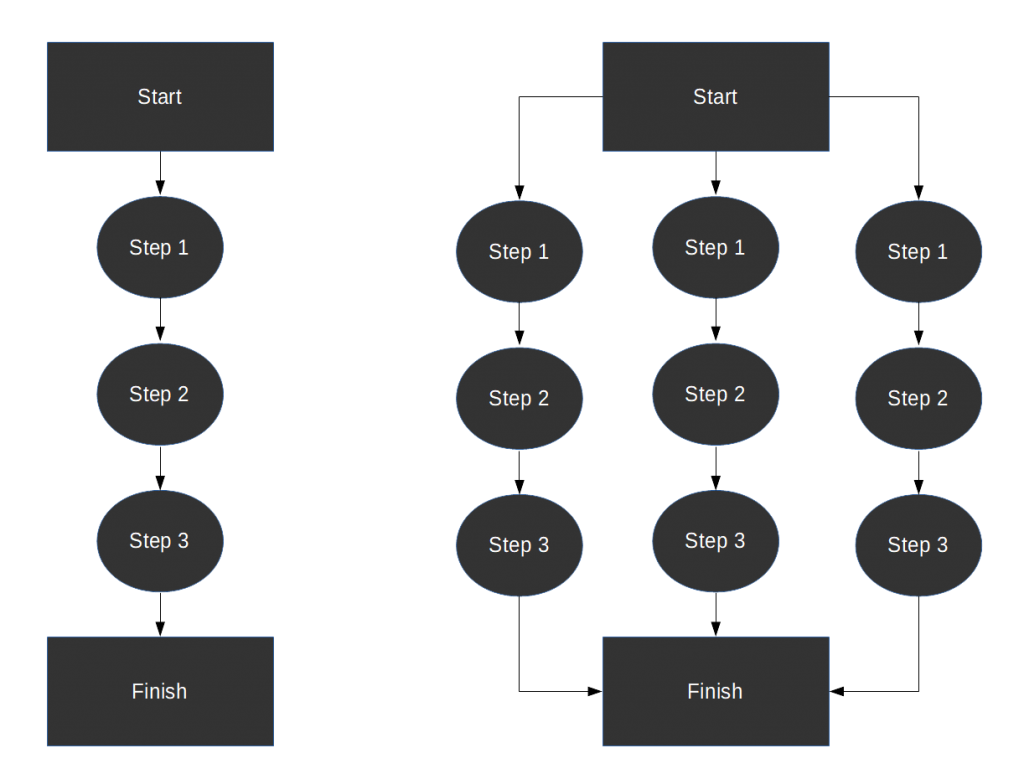

Credits: https://direct-root.com/blog/four-fundamentals-when-parallel-processing-data/

In [15]:
import numpy as np
import time


In [16]:
import multiprocessing
import time

def sleepy_man():
    print('Starting to sleep')
    time.sleep(2)
    print('Done sleeping')

# This is sleeping for 2 second
#This code defines a function sleepy_man() that sleeps for 2 second and then prints a message.

In [17]:
sleepy_man() 

Starting to sleep
Done sleeping


In [18]:
tic = time.time() #variable captures the current time using time.time() before the function calls. 
sleepy_man()
sleepy_man()
toc = time.time() #captures the time again.

print('Done in {:.4f} seconds'.format(toc-tic))


# Series processing

Starting to sleep
Done sleeping
Starting to sleep
Done sleeping
Done in 4.0041 seconds


In [19]:
def sleepy_man():
    print('Starting to sleep')
    time.sleep(2)
    print('Done sleeping')

tic = time.time()
p1 =  multiprocessing.Process(target= sleepy_man)
p2 =  multiprocessing.Process(target= sleepy_man)
p1.start()
p2.start()
toc = time.time()

print('Done in {:.4f} seconds'.format(toc-tic))

# This is multi processing. 
# One route is processed and the other route is pooled. 
# poole is for limited number of task but for computationally intensive things
# Process uses 1 process

#The multiprocessing.Process() function is used to create two process objects p1 and p2, 
# The start() method is then called on each process object to start the execution of the function in 
# separate processes. 
#p1 and p2 run in parallel, executing the sleepy_man() function concurrently.
#Join() is not used here.
# This means that the main program does not explicitly wait for the completion of the processes p1 and p2. 
# As a result, the execution of the program continues immediately after starting the processes, 
# and the timing measurement is taken without explicitly checking if the processes have completed.
# The timing measurement may not be accurate since it does not account for the actual completion of the processes.


#We can see here that the time is not accurate. 

Starting to sleep
Done in 0.0055 seconds
Starting to sleep
Done sleeping
Done sleeping


In [20]:
tic = time.time()
p1 =  multiprocessing.Process(target= sleepy_man)
p2 =  multiprocessing.Process(target= sleepy_man)
p1.start()
p2.start()
p1.join()
p2.join()  # Checking if the process has completed. We can get processes that are incomplete/unresponsive
toc = time.time()

print('Done in {:.4f} seconds'.format(toc-tic))

# Calling the function several times. Numbe of times=number of cores
# This demonstrates parallel execution of the sleepy_man() function using multiple processes. 
# Each process is executed in parallel, and the completion of all processes is ensured using the join() method.

# join() method is called on both processes immediately. 
# The join() method blocks the main program's execution until the respective process completes its execution. 
# This ensures that the main program waits for both processes to finish before proceeding.
# SO this time is accurate because it shows the time for the processes to complete their execution, 
# including the time spent in the sleepy_man() function

Starting to sleep
Starting to sleep
Done sleepingDone sleeping

Done in 2.0186 seconds


In [21]:
tic = time.time()

process_list = []
for i in range(10):
    p =  multiprocessing.Process(target= sleepy_man)
    p.start()
    process_list.append(p)

for process in process_list:
    process.join()

toc = time.time()

print('Done in {:.4f} seconds'.format(toc-tic))


# This demonstrates parallel execution of the sleepy_man() function using multiple processes. 
# Each process is executed in parallel, and the completion of all processes is ensured using the join() method. 
# The code is modified to create and start multiple processes in a loop, and then wait for all processes to 
# finish before calculating the elapsed time. 

Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done in 2.0756 seconds


In [24]:
def sleepy_man(sec):
    print('Starting to sleep')
    time.sleep(sec)
    print('Done sleeping')

import multiprocessing
import time

def sleepy_man(sec):
    print('Starting to sleep')
    time.sleep(sec)
    print('Done sleeping')

tic = time.time()

process_list = []
for i in range(10):
    p =  multiprocessing.Process(target= sleepy_man, args = [4]) # args = [4] gives the time
    p.start()
    process_list.append(p)

for process in process_list: #ensures that the main program waits for the completion of all processes before proceeding.
    process.join()

toc = time.time()

print('Done in {:.4f} seconds'.format(toc-tic))



# Here we have parallel execution of the sleepy_man() function with different sleep durations using 
# multiple processes. Each process is executed in parallel, and the completion of all processes is ensured 
# using the join() method. 

Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Starting to sleep
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleeping
Done sleepingDone sleeping

Done sleeping
Done in 4.0627 seconds


In [25]:
def sleepy_man(sec):
    print('Starting to sleep for {} seconds'.format(sec))
    time.sleep(sec)
    print('Done sleeping for {} seconds'.format(sec))

tic = time.time()

pool = multiprocessing.Pool(5)   # pool of worker processes with 5 workers 
pool.map(sleepy_man, range(1,11))  #Arguments for the time
pool.close()

toc = time.time()

print('Done in {:.4f} seconds'.format(toc-tic))


#map() method distributes the tasks among the worker processes, with each process executing the sleepy_man() 
# function with a different sleep duration specified by the range values.

#close() method is invoked to prevent any new tasks from being submitted to the pool. 
# The join() method is then called to wait for all the processes in the pool to complete their execution.

Starting to sleep for 3 secondsStarting to sleep for 1 secondsStarting to sleep for 2 secondsStarting to sleep for 4 secondsStarting to sleep for 5 seconds




Done sleeping for 1 seconds
Starting to sleep for 6 seconds
Done sleeping for 2 seconds
Starting to sleep for 7 seconds
Done sleeping for 3 seconds
Starting to sleep for 8 seconds
Done sleeping for 4 seconds
Starting to sleep for 9 seconds
Done sleeping for 5 seconds
Starting to sleep for 10 seconds
Done sleeping for 6 seconds
Done sleeping for 7 seconds
Done sleeping for 8 seconds
Done sleeping for 9 seconds
Done sleeping for 10 seconds
Done in 15.0452 seconds


In [45]:
# checks whether each number in the range from 1 to 99,999 is a perfect number using the is_perfect() 
#function

def is_perfect(n):
    sum_factors = 0
    for i in range(1, n):
        if (n % i == 0):
            sum_factors = sum_factors + i
    if (sum_factors == n):
        print('{} is a Perfect number'.format(n))

tic = time.time()
for n in range(1,100000):
#for n in range(1,1000):
    is_perfect(n)
toc = time.time()

print('Done in {:.4f} seconds'.format(toc-tic))


# is_perfect() function checks whether a given number n is a perfect number by calculating the sum of its 
# proper divisors. If the sum of factors is equal to the number itself, it is considered a perfect number, 
# and the result is printed.

#THIS IS A SEQUENTIAL EXECUTION.

6 is a Perfect number
28 is a Perfect number
496 is a Perfect number
8128 is a Perfect number
Done in 163.9818 seconds


In [43]:
def is_perfect(n):
    sum_factors = 0
    for i in range(1, n):
        if(n % i == 0):
            sum_factors = sum_factors + i
    if (sum_factors == n):
        print('{} is a Perfect number'.format(n))

tic = time.time()

processes = []
for i in range(1,1000):#00): # Cannot process this big number because of memory
    p = multiprocessing.Process(target=is_perfect, args=(i,))
    processes.append(p)
    p.start()

for process in processes:
    process.join()

toc = time.time()
print('Done in {:.4f} seconds'.format(toc-tic))


#This code does the exact same thing but using parallel processing.
# But it cannot take values above 1000.

6 is a Perfect number
28 is a Perfect number
496 is a Perfect number
Done in 4.2811 seconds


In [46]:
def is_perfect(n):
    sum_factors = 0
    for i in range(1, n):
        if(n % i == 0):
            sum_factors = sum_factors + i
    if (sum_factors == n):
        print('{} is a Perfect number'.format(n))

tic = time.time()
pool = multiprocessing.Pool()
pool.map(is_perfect, range(1,100000))
pool.close()
toc = time.time()

print('Done in {:.4f} seconds'.format(toc-tic))




6 is a Perfect number
28 is a Perfect number
496 is a Perfect number
8128 is a Perfect number
Done in 69.6555 seconds
